In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


The Highest Accuracy is:  0.9824561403508771
The Number of Trees for the highest accuracy is:  4


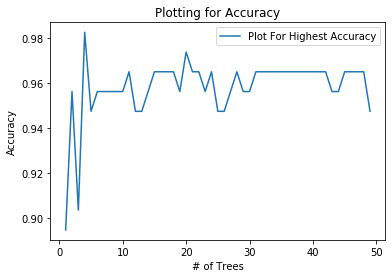

In [36]:
data = datasets.load_breast_cancer()

X = data['data']
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

X_train_s = preprocessing.scale(X_train)
X_test_s = preprocessing.scale(X_test)

ans = []
ind = []

for i in range(1,50):
    clf = RandomForestClassifier(n_estimators = i)
    clf.fit(X_train_s, y_train)
    ans.append(clf.score(X_test_s, y_test))
    ind.append(i)

print("The Highest Accuracy is: ",max(ans))
print("The Number of Trees for the highest accuracy is: ",(ans.index(max(ans)) + 1))

acc = (ans.index(max(ans)) + 1)

plt.plot(ind,ans, label = "Plot For Highest Accuracy")
plt.xlabel("# of Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Plotting for Accuracy")
plt.show()

4
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


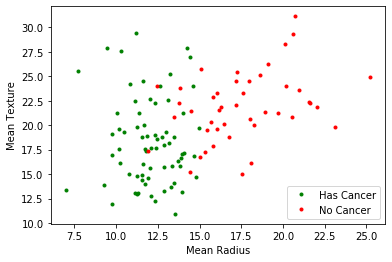

Accuracy of the Thing:  0.9473684210526315


In [37]:
clf_best = RandomForestClassifier(n_estimators = acc)
print(acc)
clf_best.fit(X_train_s, y_train)
preds = clf_best.predict(X_test_s)
print(preds)
print(y_test)
plt.plot(X_test[:,0][preds == 1],  X_test[:,1][preds == 1], 'g.', label = "Has Cancer")
plt.plot(X_test[:,0][preds == 0],  X_test[:,1][preds == 0], 'r.', label = "No Cancer")
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()
print("Accuracy of the Thing: ",clf.score(X_test_s,y_test))